The magnetic field is parallel with z. There are no spectra for the TTMult calculations, only expectation values for the ground state of the initial Hamiltonian (the calculation time accounts only for this). To properly compared the calculations, the parameters in the TTMult calculation are identical for the two electronic configurations of the initial Hamiltonian (they are usually different).

Expectation values for the initial Hamiltonian:

|  Program  | 〈*H*〉 | 〈*Sk*〉 | 〈*Lk*〉 |
| --- | --- | --- | --- |
|Quanty | -8.074128 | -0.169953 | -0.776636 |
|TTMult | -8.07413  | -0.169949 | -0.776614 |


Expectation values for the final Hamiltonian:

|  Program  | 〈*H*〉 | 〈*Sk*〉 | 〈*Lk*〉 |
| --- | --- | --- | --- |
|Quanty | -13.579490 | -0.051067 | -0.542007 |
|TTMult | N/A | N/A | N/A |

Timings:

|  Program    | Time (seconds) | 
| --- | --- |
|Quanty 1 CPU| 127 |
|Quanty 8 CPU| 22 |
|TTMult | 126 |

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import sys
import math

sys.path.insert(0, '../../utils')
from read_spectrum import read_quanty_spectrum

In [2]:
SHIFT = 0

# Spectra

<IPython.core.display.Javascript object>


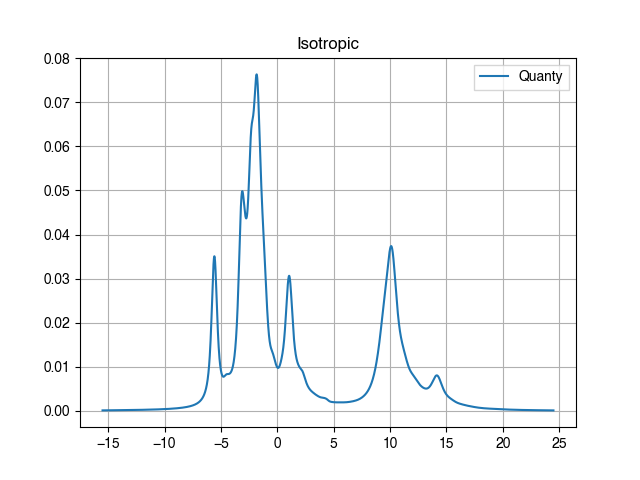

In [32]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_iso.spec')
ax.plot(x + SHIFT, y, label='Quanty')
xiso_quanty = x
yiso_quanty = y

plt.title('Isotropic')
ax.legend()

<IPython.core.display.Javascript object>


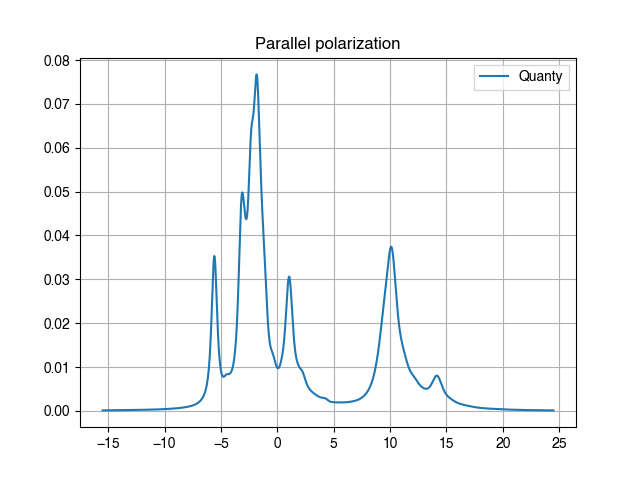

In [31]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_k.spec')
ax.plot(x + SHIFT, y, label='Quanty')

plt.title('Parallel polarization')
ax.legend()

<IPython.core.display.Javascript object>


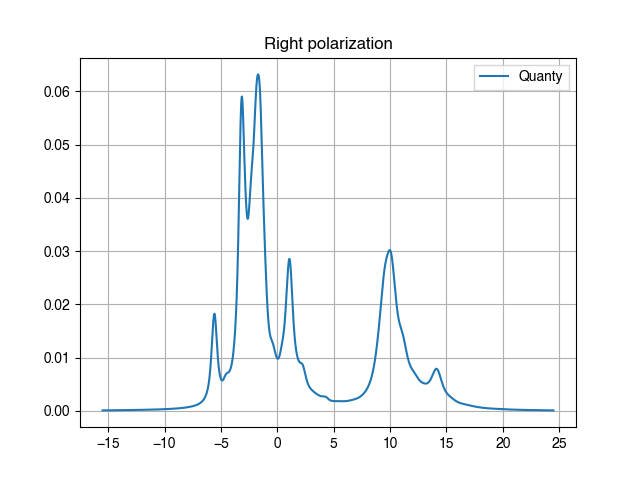

In [5]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_r.spec')
ax.plot(x + SHIFT, y, label='Quanty')

plt.title('Right polarization')
ax.legend()

<IPython.core.display.Javascript object>


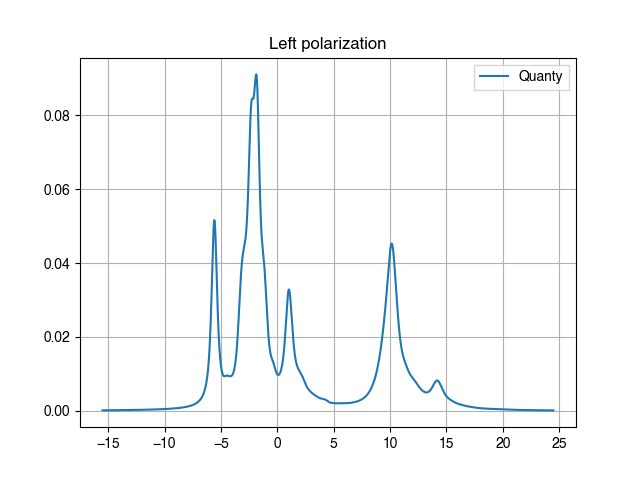

In [6]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_l.spec')
ax.plot(x + SHIFT, y, label='Quanty')

plt.title('Left polarization')
ax.legend()

<IPython.core.display.Javascript object>


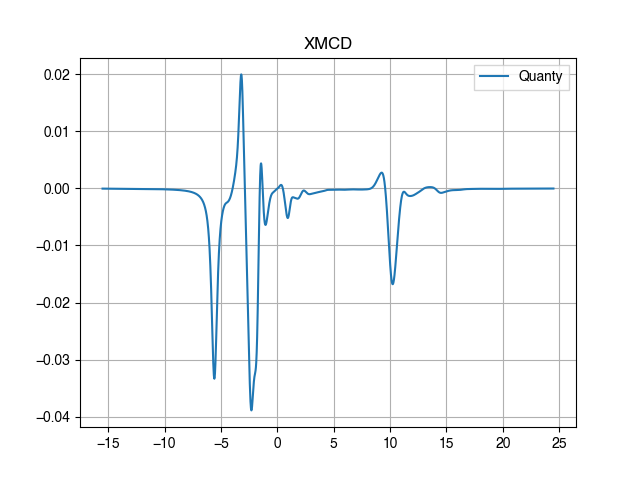

In [7]:
fig, ax = plt.subplots()
ax.grid()

x, y = read_quanty_spectrum('Quanty/input_cd.spec')
ax.plot(x + SHIFT, y, label='Quanty')
xcd_quanty = x
ycd_quanty = y

plt.title('XMCD')
ax.legend()

# Sum rules

3$\int_{Iso} = \frac{4l + 2 - n_d}{(2l + 1)}$ 

In [12]:
nd_calculation = 4.718498
nd_sum_rule = 10 - 3 * 5 * np.trapz(yiso_quanty, xiso_quanty)

print('nd (calculation) = {:f}'.format(nd_calculation))
print('nd (sum rule)    = {:f}'.format(nd_sum_rule))

nd (calculation) = 4.718498
nd (sum rule)    = 4.781122


$\langle L_z \rangle = \frac{2}{3} \frac{\int_{XMCD}}{\int_{Iso}} (10 - n_d)$

In [14]:
Lz_calculation = -0.776636
Lz_sum_rule = 2. / 3. * np.trapz(ycd_quanty, xcd_quanty) / np.trapz(yiso_quanty, xiso_quanty) * (10 - nd_sum_rule)

print('Lz (calculation) = {:f}'.format(Lz_calculation))
print('Lz (sum rule)    = {:f}'.format(Lz_sum_rule))

Lz (calculation) = -0.776636
Lz (sum rule)    = -0.758545
